# Billboard Top 100 Predictor
## Alex Alvarez

### Table of Contents

1. Problem Statement
2. Data Preparation
3. Analysis and Synthesis
4. Modeling


#### Problem Statement

How can a music agency increase sales by 5% with a focus on hit music in 2020?


#### Data Preparation

##### Imported libraries

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [91]:
def ms_to_s(ms):
    s = ms/1000
    return s

dataframe_10 = pd.read_csv('dataset-of-10s.csv', header = 0)
dataframe_10['Decade'] = 2010
dataframe_10['duration_s'] = ms_to_s(dataframe_10['duration_ms'])
dataframe_00 = pd.read_csv('dataset-of-00s.csv', header = 0)
dataframe_00['Decade'] = 2000
dataframe_00['duration_s'] = ms_to_s(dataframe_10['duration_ms'])
dataframe_90 = pd.read_csv('dataset-of-90s.csv', header = 0)
dataframe_90['Decade'] = 1990
dataframe_90['duration_s'] = ms_to_s(dataframe_10['duration_ms'])
dataframe_80 = pd.read_csv('dataset-of-80s.csv', header = 0)
dataframe_80['Decade'] = 1980
dataframe_80['duration_s'] = ms_to_s(dataframe_10['duration_ms'])
dataframe_70 = pd.read_csv('dataset-of-70s.csv', header = 0)
dataframe_70['Decade'] = 1970
dataframe_70['duration_s'] = ms_to_s(dataframe_10['duration_ms'])
dataframe_60 = pd.read_csv('dataset-of-60s.csv', header = 0)
dataframe_60['Decade'] = 1960
dataframe_60['duration_s'] = ms_to_s(dataframe_10['duration_ms'])

##### Note:

The following columns, Decade and duration_s, were added to the csv. files for data preparation and indexing

In [92]:
combine = [dataframe_10, dataframe_00, dataframe_90, dataframe_80, dataframe_70, dataframe_60]
df = pd.concat(combine)

df.set_index('Decade', inplace = True)

print(df.describe())
print(df.info())

df.head()

       danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816000      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.374250      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,duration_s
Decade,,,,,,,,,,,,,,,,,,,,
2010,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1,188.493
2010,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0,176.880
2010,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1,205.463
2010,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0,193.043
2010,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1,144.244


##### Note:

Created a combined dataframe, df, and indexed Decade. Description and information are provided below.

In [93]:
df_target_1 = df[df['target'] == 1]

In [94]:
df_target_0 = df[df['target'] == 0]

In [95]:
fields_focused = ['danceability', 'instrumentalness', 'valence', 'loudness', 'energy', 'speechiness', 
                  'acousticness', 'liveness', 'tempo', 'chorus_hit', 'duration_s']

##### Note:

Seperated the binary variable for visualizations. Target = 1 corresponds to a "Hit Song" and Target = 0 corresponds to a "Flop Song". Fields_Focused was created to clean the data of irrelevant or boolean variables such as Artist, Track and uri.

#### Analysis and Synthesis

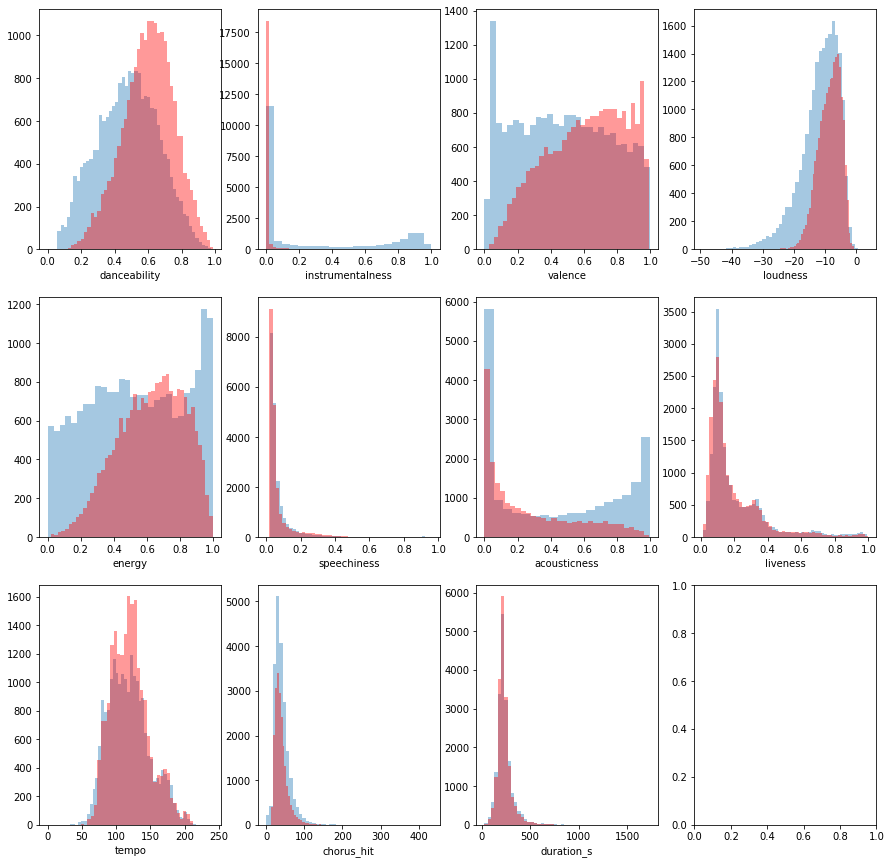

In [101]:
mpl.rcParams['figure.figsize'] = (15,15)
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()
for i, field in enumerate(fields_focused):
    sns.distplot(df_target_0[field], kde = False, ax = axes[i])
    sns.distplot(df_target_1[field], kde = False, ax = axes[i], color = 'red')

##### Insights for Histograms: 

After reviewing the above histograms, the following variables show to be least affected by 'Target': speechiness, liveness, tempo and duration_s. We will further look into each variable in the below boxplots.

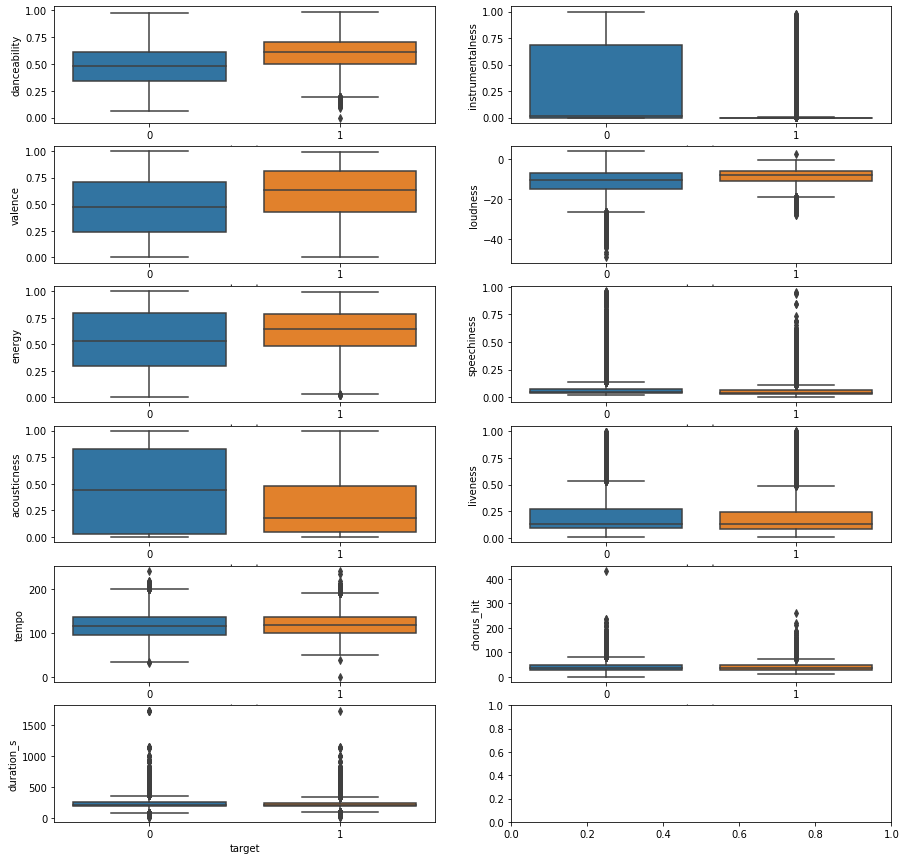

In [97]:
mpl.rcParams['figure.figsize'] = (15,15)
fig, axes = plt.subplots(6, 2)
axes = axes.flatten()

for i, field in enumerate(fields_focused):
    sns.boxplot(x = 'target', y = field, data = df, ax=axes[i])

plt.show()
    

##### Insights for Boxplots:

Danceability - Hit songs are more likely to be more "danceable" than flop songs with a few outliers that prove to be less "danceable". While flop songs are consistent with being less "danceable" than hit songs.

Instrumentalness - Hit songs have several outliers compared to flop songs that generally keep between 0 - 0.7 on the scale. This is not a good indication of predicting hit songs.

Valence - With minimal outliers for both hit and flop songs, hit songs have a smaller distribution and are generally "happier" or more "up-beat" than flop songs.

Loudenss - Hit songs have better sound quality than flop songs with less outliers that flop songs. From the boxplot, you can see that there are severaly songs that have low sound quality.

Energy - There is a smaller distrubution in hit songs, although the upper quartiles are similar for both hit and flop songs, there are more flop songs that are not as energetic and fast.

Speechiness - There are several outliers for both hit and flop songs with a dispersion closer to 0, where most music sets between 0 and .33. Since rap songs are more prelevant, this explains the amount of outliers across the board.

Acousticness - Hit songs have a narrower distribution with generally less acoustics than flop songs. 

Liveness - The boxplots for flop and hit songs are similar with outliers for recordings of songs that are done with a live audience. 

Tempo - The boxplots are again similar in this arena, with generally a consistent speed (BPM) for all songs. Hit songs represent more outliers for faster and slower songs.

Chorus_Hit - The boxplots are almost homogenous as the chorus in songs generally begin around the same time, with the exception of outliers that start later in the song. Thus, having a longer intro.

Duration_S - The duration of all songs are generally a little less than 250 seconds (approx. 4 minutes). Of course, there are always songs that are longer and shorter but does not prove to have a strong affect on whether it is a hit or flop song.

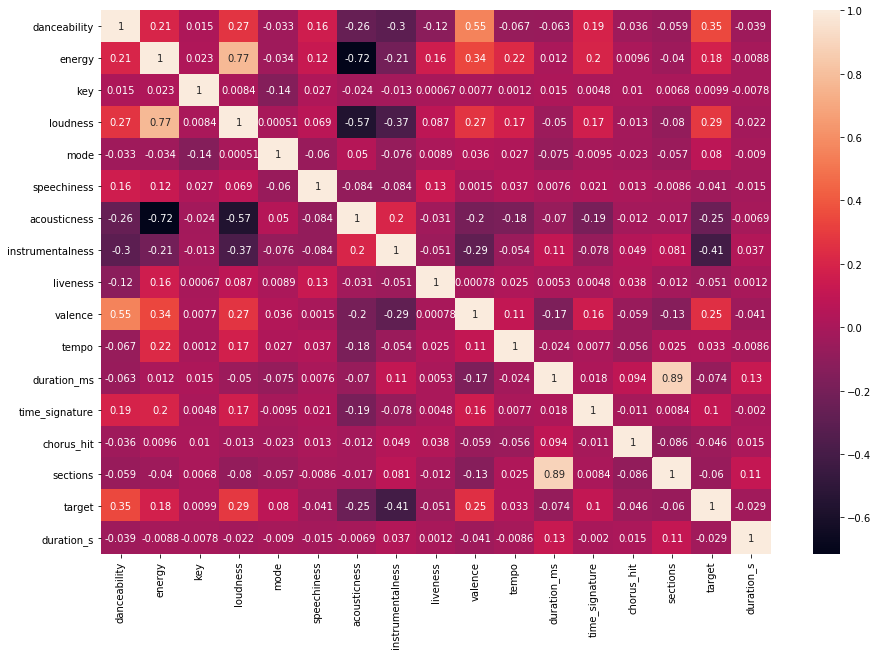

In [98]:
mpl.rcParams['figure.figsize'] = (15,10)

sns.heatmap(df.corr(), annot = True)

##### Insights for Correlation Matrix: 

The above correlation matrix is to be focused on the last row, 'target'. The top 5 strongest correlations are 'danceability'(.35), 'loudness'(.29), 'acousticness'(-.25), 'instrumentalness'(-.41) and 'valence'(.25).

#### Modeling

In [99]:
fields_focused_log_reg = ['danceability', 'instrumentalness', 'valence',
                          'loudness', 'acousticness']

X=df[fields_focused_log_reg]
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format
      (logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [100]:
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      6171
           1       0.67      0.80      0.73      6161

    accuracy                           0.70     12332
   macro avg       0.71      0.70      0.70     12332
weighted avg       0.71      0.70      0.70     12332



##### Insights for Logistic Regression:

The above modeling represents an accuracy of 70%, using the 5 strongest correlation variables (represented in fields_focused_log_reg). When looking at the confusion matrix, the precision of "Hit Songs" (1) is .67 while "Flop Songs" (0) is .75. Next steps would be to identify what adiditional data can improve both the general accuracy as well as the precision for "Hit Songs", since that is what we would be predicting. For even further analysis in regards to the problem statement, I would need revenue data from a recording studio to make a more accurate decision on revenue implications, in this case, increasing revenue by 5%.  